In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib
from matplotlib import pyplot
import gower
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from numpy import unique
from numpy import where
from sklearn.cluster import *
from survival_plot import cluster_KMplot
from sklearn_extra.cluster import KMedoids, CommonNNClustering
import numpy as np
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [2]:
surv_file = "../../survival_KIRP.csv"
encoding = "../data/gae/SM/L2GATv2Conv/ADAM_3e-05/final_alsnmf.csv"

In [3]:
from clustering import *

In [4]:
res = do_all_clustering(encoding_file_path = encoding ,  survival_file_path= surv_file)

In [5]:
pd.DataFrame(res)

,0,1,2,3,4
0,KMEANS,2,0.673690,0.142787,0.187997
1,KMEANS,3,0.605984,0.019857,0.080456
2,KMEANS,4,0.604271,0.025598,0.024191
3,KMEANS,5,0.549217,0.104497,0.020745
4,KMEANS,6,0.546821,0.020666,0.013013
5,PAM,2,0.612570,0.465760,0.237107
6,PAM,3,0.554860,0.063338,0.109951
7,PAM,4,0.572203,0.019835,0.059397
8,PAM,5,0.548716,0.114387,0.035986
9,PAM,6,0.537791,0.073043,0.025996


In [6]:
enc = pd.read_csv(encoding, index_col=0).fillna(0)
cols = enc.columns
for col in cols:
    enc[col] = enc[col].astype(float)

In [7]:
enc

,x,y
TCGA-GL-7966,0.212142,0.043409
TCGA-BQ-7048,0.155933,0.092068
TCGA-BQ-7058,0.128006,0.115201
TCGA-BQ-7061,0.144822,0.091335
TCGA-UZ-A9Q0,0.225889,0.034574
...,...,...
TCGA-A4-8098,0.105445,0.165879
TCGA-P4-A5E8,0.235795,0.033472
TCGA-IA-A40U,0.075523,0.350776
TCGA-DW-7834,0.198617,0.046754


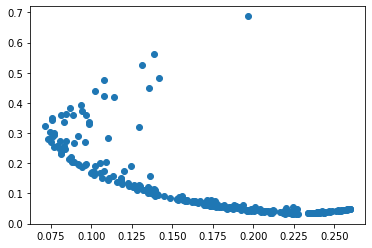

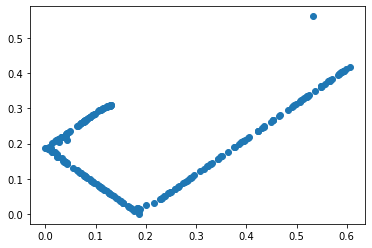

In [8]:
plt.scatter(enc.iloc[:,0], enc.iloc[:,1])
plt.show()
gow = gower.gower_matrix(enc)
plt.scatter(gow[:,0], gow[:,1])
plt.show()

## Kmeans

(251, 2)


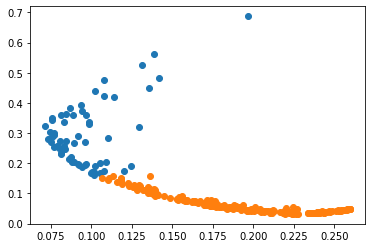

In [9]:
X = np.array(enc)
# dist = gower.gower_matrix(enc)
# X = dist
print(X.shape)
model = KMeans(n_clusters=2)
yhat = model.fit_predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

1.2970068755231228
0.6903687276639708
0.4297544362923398
0.27661687595906154
0.20424673230907509


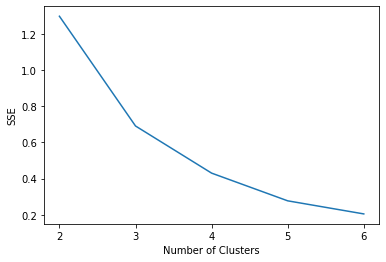

3

In [10]:
sse = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(enc)
    sse.append(kmeans.inertia_)
    print(kmeans.inertia_)

plt.plot(range(2, 7), sse)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(range(2, 7), sse, curve="convex", direction="decreasing")
kl.elbow

0.6736904458217838
0.60598381908885
0.6042708166419372
0.5492170510541493
0.5443090143412912


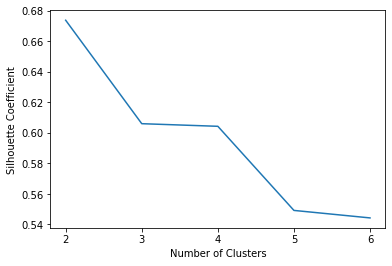

In [11]:
silhouette_coefficients = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(enc)
    score = silhouette_score(enc, kmeans.labels_)
    silhouette_coefficients.append(score)
    print(score)
    

plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [12]:
from lifelines.statistics import multivariate_logrank_test as multiv_lr_test
from lifelines import KaplanMeierFitter

In [13]:
def log_rank_test(enc_index, labels, surv):
    
    cluster_assign = pd.DataFrame([enc_index,labels]).T
    cluster_assign.columns = ["patient", "subtype"]
    cluster_assign = cluster_assign.set_index("patient")
    cluster_assign = cluster_assign.subtype
    
    clusters = sorted(list(cluster_assign.value_counts().index))
    k = len(clusters)
    tmax=-1
    cluster_survivals = pd.concat(
        [surv, cluster_assign], axis=1).dropna().astype(int)
    p = multiv_lr_test(np.array(cluster_survivals.overall_survival),
                        np.array(cluster_survivals[cluster_assign.name]), t_0=tmax,
                        event_observed=np.array(cluster_survivals.vital_status)).p_value
    return p

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(enc)
surv = pd.read_csv(surv_file, index_col=0)

log_rank_test(enc.index, kmeans.labels_, surv)

0.01985694769458646

Multi-Class Log-Rank P: 0.1427866700952509


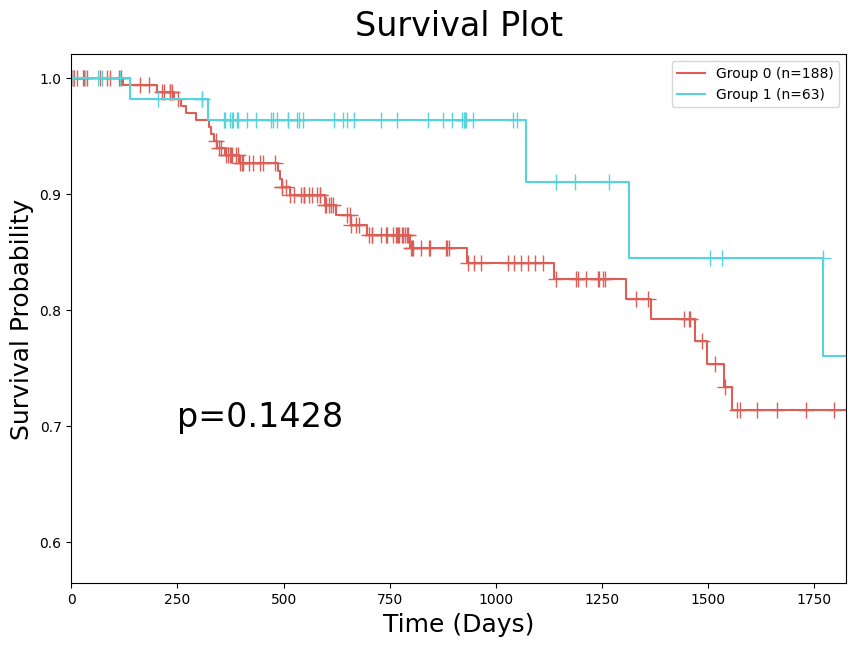

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.01985694769458646


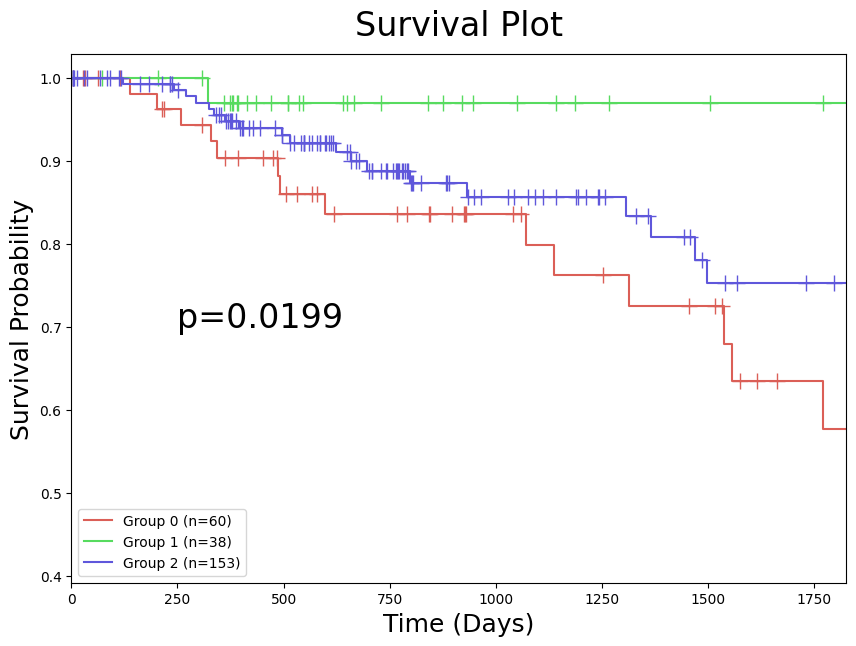

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.02559844848653955


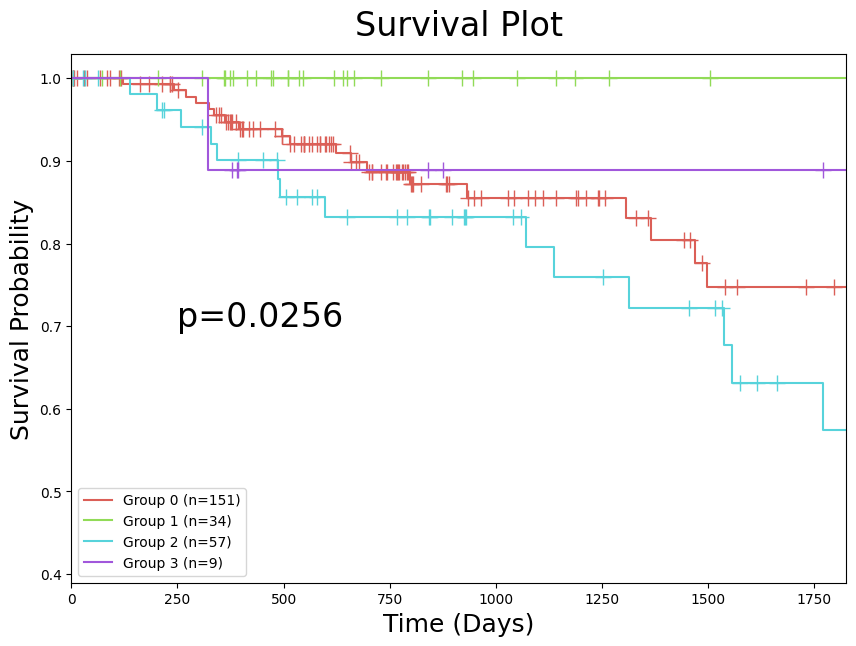

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.10449731690302629


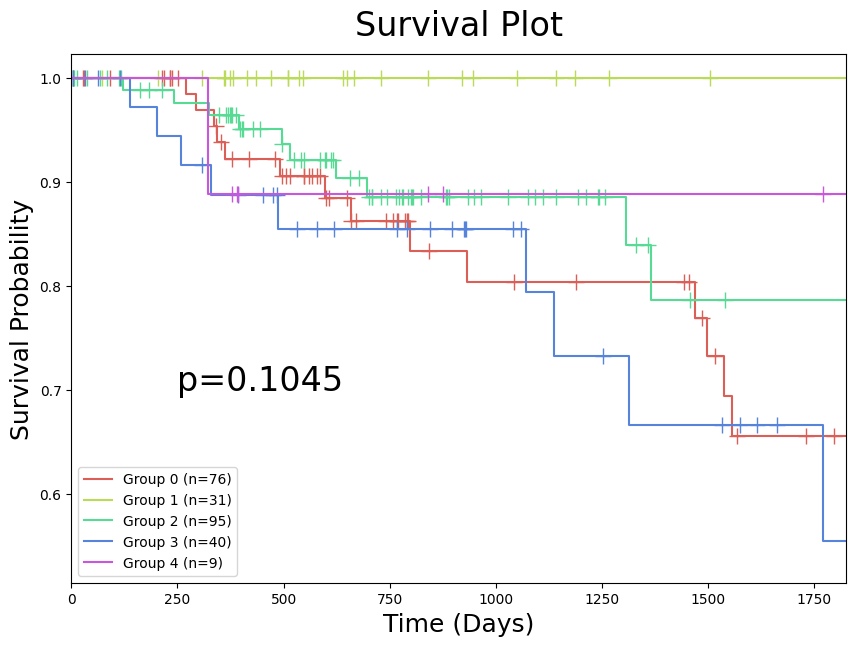

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.020665716297262854


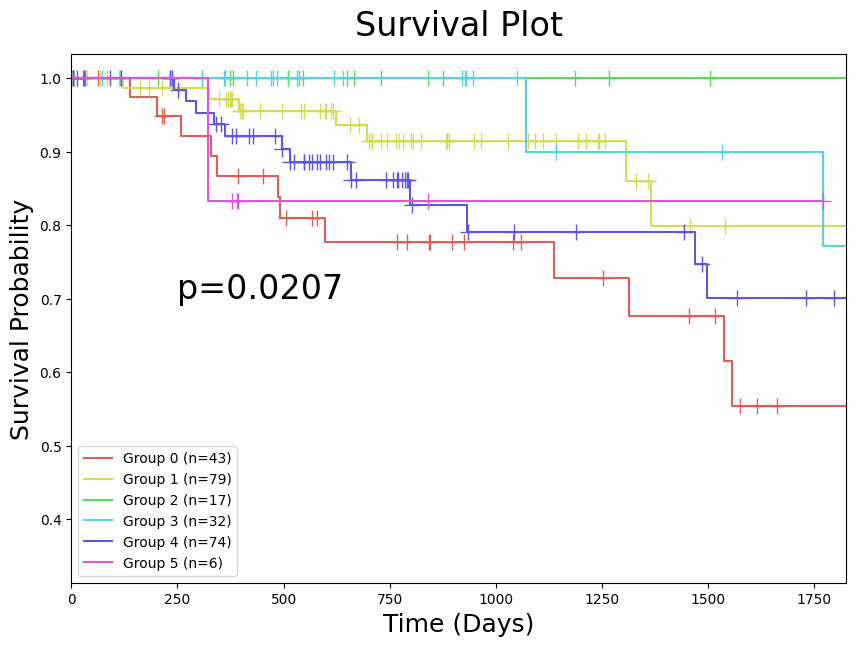

Kaplan Meier Plot constructed
0.1427866700952509
0.01985694769458646
0.02559844848653955
0.10449731690302629
0.020665716297262854


In [15]:
pval = []
for i in range(2,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(enc)
    pred = pd.DataFrame(kmeans.labels_,index =enc.index) 
    cluster_assign = pd.DataFrame([enc.index,kmeans.labels_]).T
    cluster_assign.columns = ["patient", "subtype"]
    cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
    # print(cluster_assign)
    cluster_assign=cluster_assign.set_index("patient")
    clust_asgn = cluster_assign.subtype
    pval.append(cluster_KMplot(clust_asgn, surv_file, delimiter=','))
for i in pval:
    print(i)

## PAM clustering

In [16]:
dist = gower.gower_matrix(enc)

(251, 251)


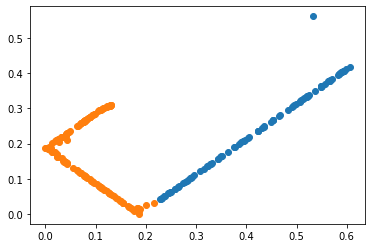

In [17]:
X = dist
print(X.shape)
model = KMedoids(n_clusters=2,init='k-medoids++')
yhat = model.fit_predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

0.5948668833051323
0.482262112929649
0.5106333236379074
0.4879160498554911
0.45417011160780213
351.21857
239.61356
175.04547
149.20139
132.65445


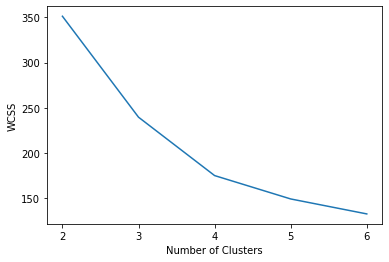

In [18]:
silhouette_coefficients = []
sse = []
for k in range(2, 7):
    pam = KMedoids(n_clusters=k,init='k-medoids++')
    pam.fit(dist)
    score = silhouette_score(enc, pam.labels_)
    silhouette_coefficients.append(score)
    sse.append(pam.inertia_)
    print(score)

for i in sse:
    print(i)

plt.plot(range(2, 7), sse)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

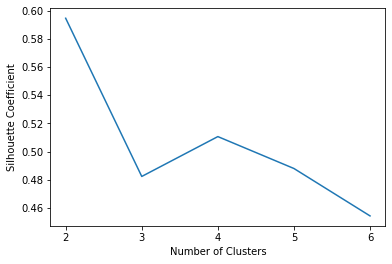

In [19]:
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Multi-Class Log-Rank P: 0.46576014952356015


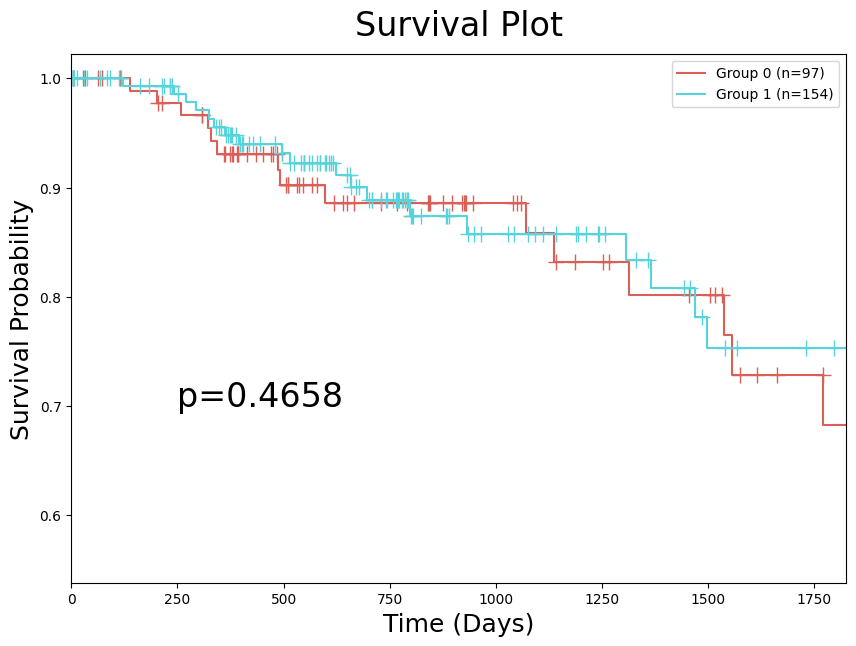

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.06333781627000251


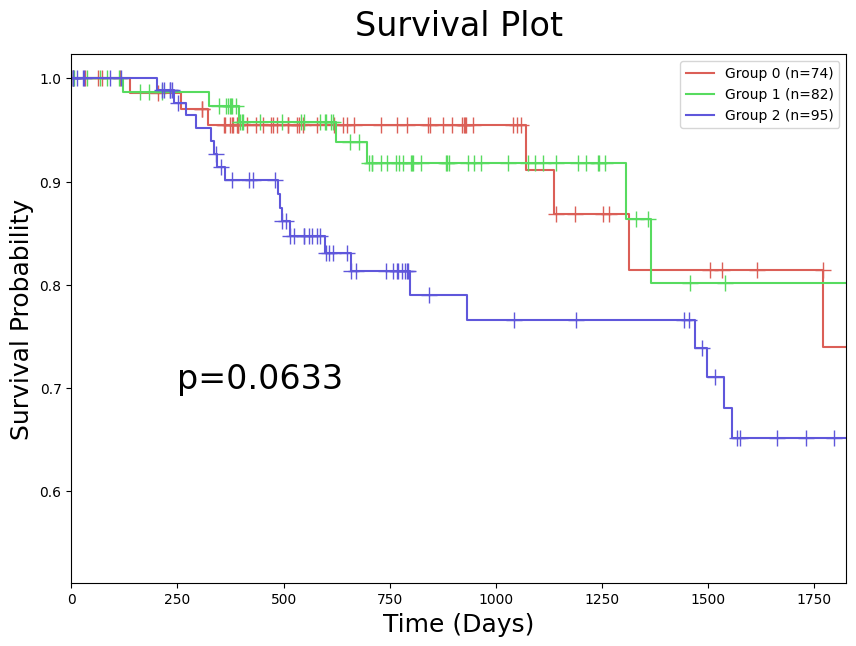

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.019834880670965827


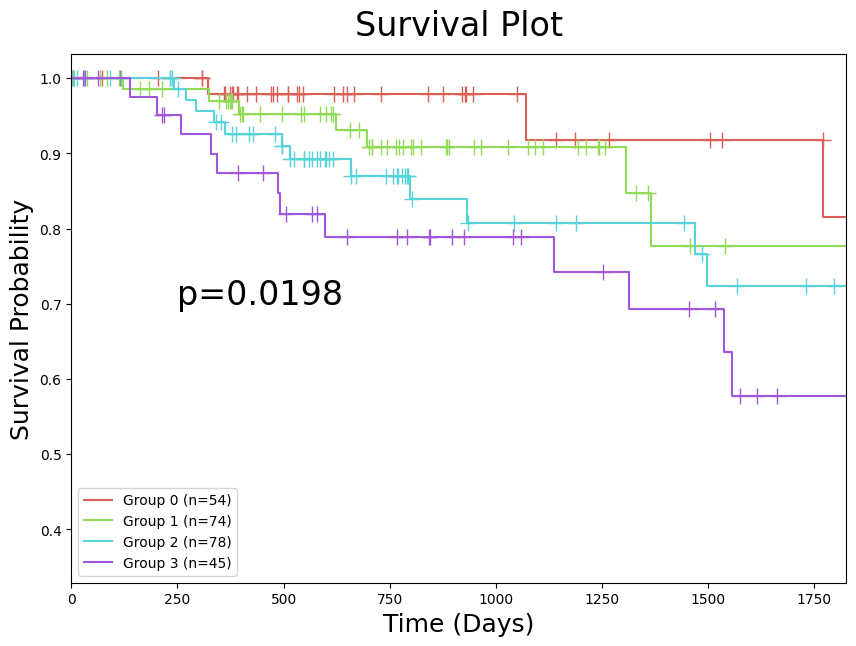

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.04167389972236601


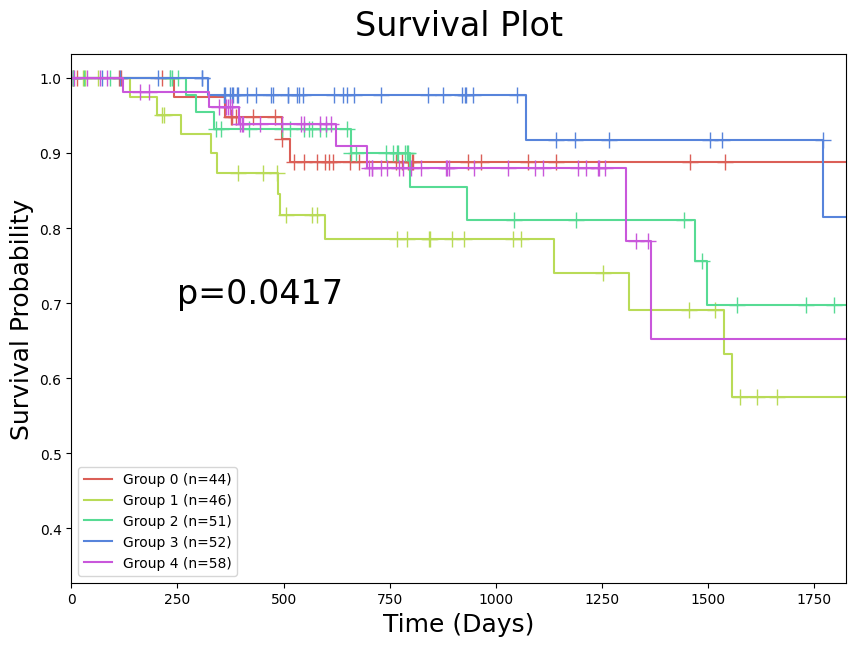

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.0576167610010955


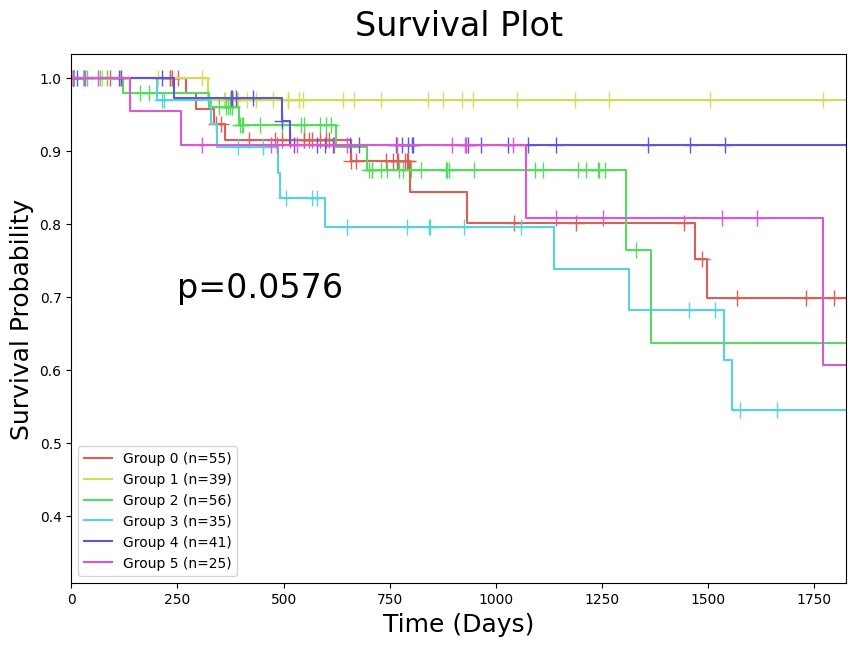

Kaplan Meier Plot constructed
0.46576014952356015
0.06333781627000251
0.019834880670965827
0.04167389972236601
0.0576167610010955


In [20]:
pval = []
for i in range(2,7):
    dist = gower.gower_matrix(enc)
    pam = KMedoids(n_clusters=i, init='k-medoids++')
    pam.fit(dist)
    pred = pd.DataFrame(pam.labels_,index =enc.index) 
    cluster_assign = pd.DataFrame([enc.index,pam.labels_]).T
    cluster_assign.columns = ["patient", "subtype"]
    cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
    # print(cluster_assign)
    cluster_assign=cluster_assign.set_index("patient")
    clust_asgn = cluster_assign.subtype
    pval.append(cluster_KMplot(clust_asgn, surv_file, delimiter=','))
for i in pval:
    print(i)

## CommonNN 

In [21]:
clustering = CommonNNClustering(eps=0.005, min_samples=0)
clustering.fit(enc)

CommonNNClustering(eps=0.005, min_samples=0)

In [22]:
len(unique(clustering.labels_))

23

In [23]:
silhouette_score(enc, clustering.labels_)

0.28821332447367115

Multi-Class Log-Rank P: 0.8017681185337511


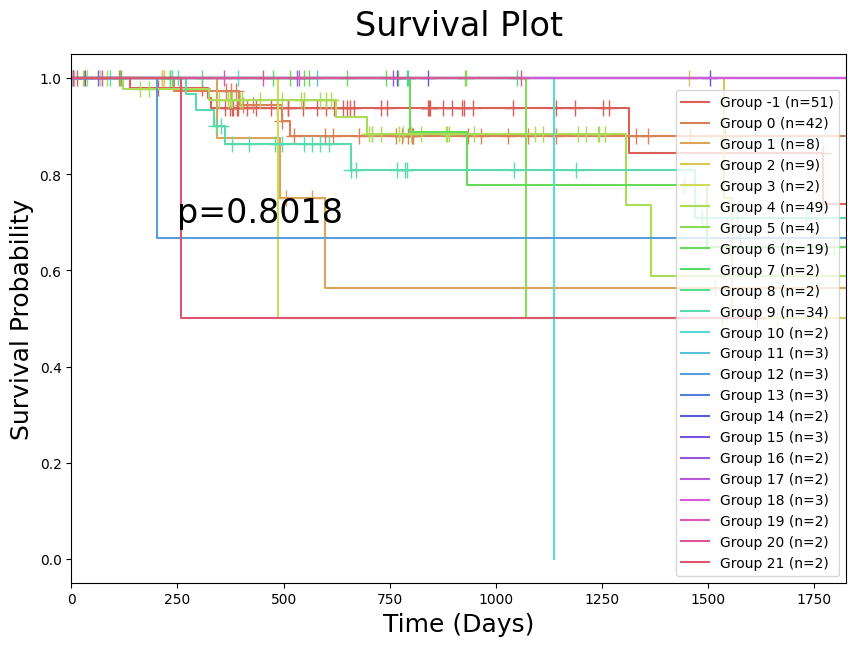

Kaplan Meier Plot constructed


0.8017681185337511

In [24]:
cluster_assign = pd.DataFrame([enc.index,clustering.labels_]).T
cluster_assign.columns = ["patient", "subtype"]
cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
cluster_assign=cluster_assign.set_index("patient")
clust_asgn = cluster_assign.subtype
cluster_KMplot(clust_asgn, surv_file, delimiter=',')

## Affinitypropagation

(251, 251)


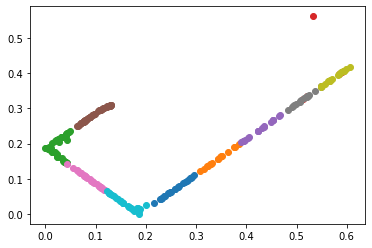

Multi-Class Log-Rank P: 0.061813629957736656


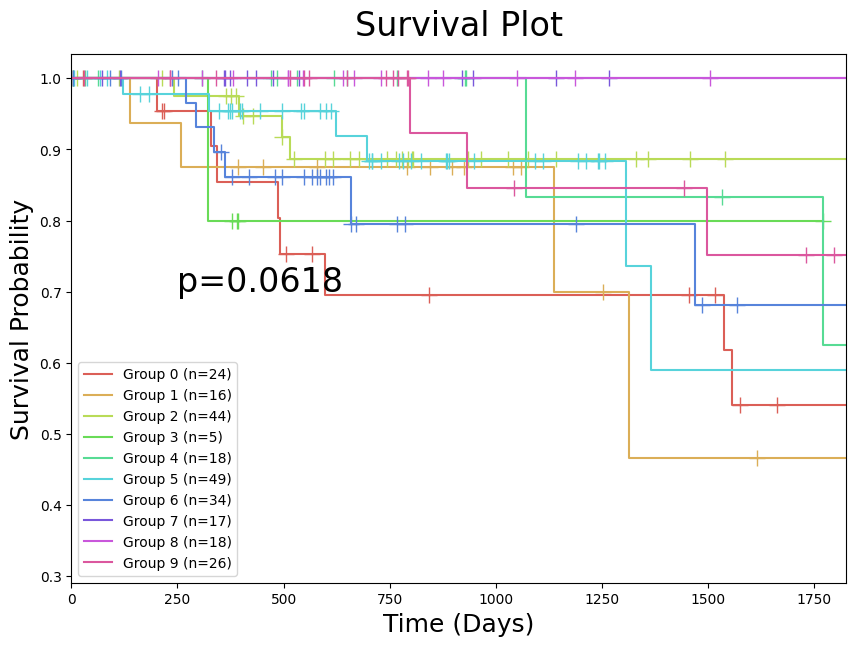

Kaplan Meier Plot constructed


0.061813629957736656

In [25]:
dist = gower.gower_matrix(enc)
X = dist
print(X.shape)
model = AffinityPropagation(damping=0.9)
model.fit(X)
yhat = model.predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()


cluster_assign = pd.DataFrame([enc.index,model.labels_]).T
cluster_assign.columns = ["patient", "subtype"]
cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
cluster_assign=cluster_assign.set_index("patient")
clust_asgn = cluster_assign.subtype
cluster_KMplot(clust_asgn, surv_file, delimiter=',')

## Agglomerative clustering

(251, 2)


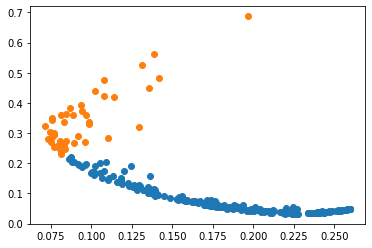

Multi-Class Log-Rank P: 0.030113892675020962


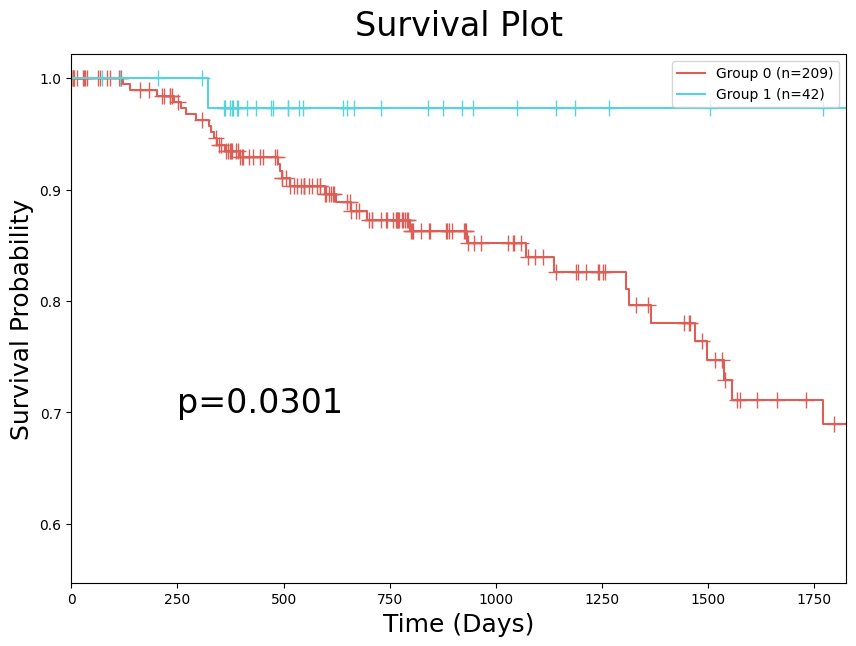

Kaplan Meier Plot constructed


0.030113892675020962

In [26]:
X = np.array(enc)
# dist = gower.gower_matrix(enc)
# X = dist
print(X.shape)
model = AgglomerativeClustering(n_clusters=2)
yhat = model.fit_predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()


cluster_assign = pd.DataFrame([enc.index,model.labels_]).T
cluster_assign.columns = ["patient", "subtype"]
cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
cluster_assign=cluster_assign.set_index("patient")
clust_asgn = cluster_assign.subtype
cluster_KMplot(clust_asgn, surv_file, delimiter=',')

0.675070293768612
0.6001557013097034
0.6090578755117305
0.543423693474576
0.5299214485992931


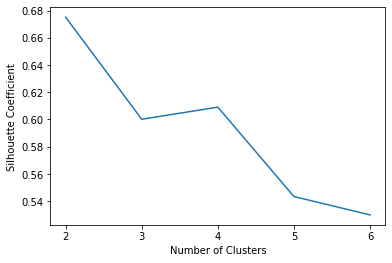

In [27]:
silhouette_coefficients = []
for k in range(2, 7):
    clust = AgglomerativeClustering(n_clusters=k)
    clust.fit(enc)
    score = silhouette_score(enc, clust.labels_)
    silhouette_coefficients.append(score)
    print(score)
    

plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Multi-Class Log-Rank P: 0.030113892675020962


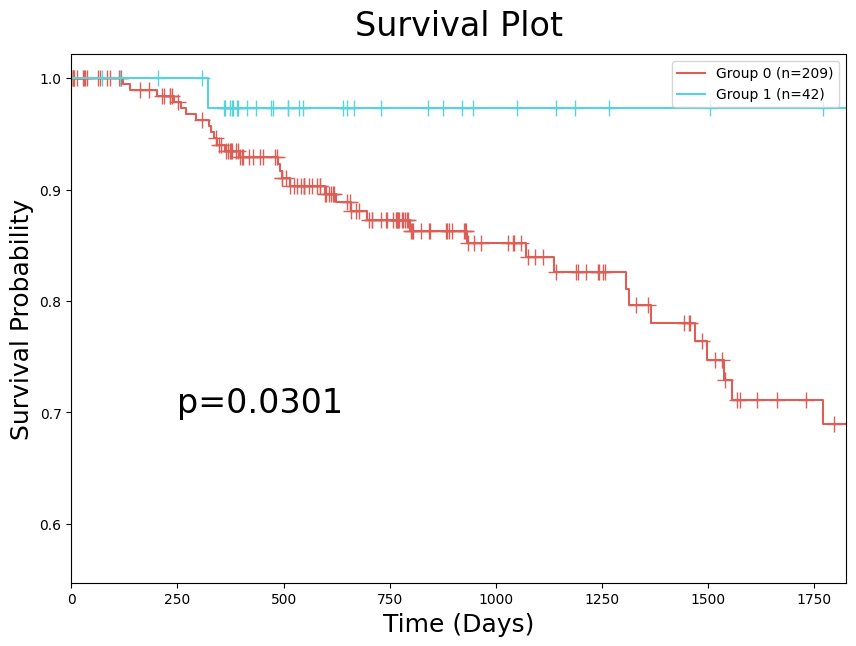

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.008415410421559745


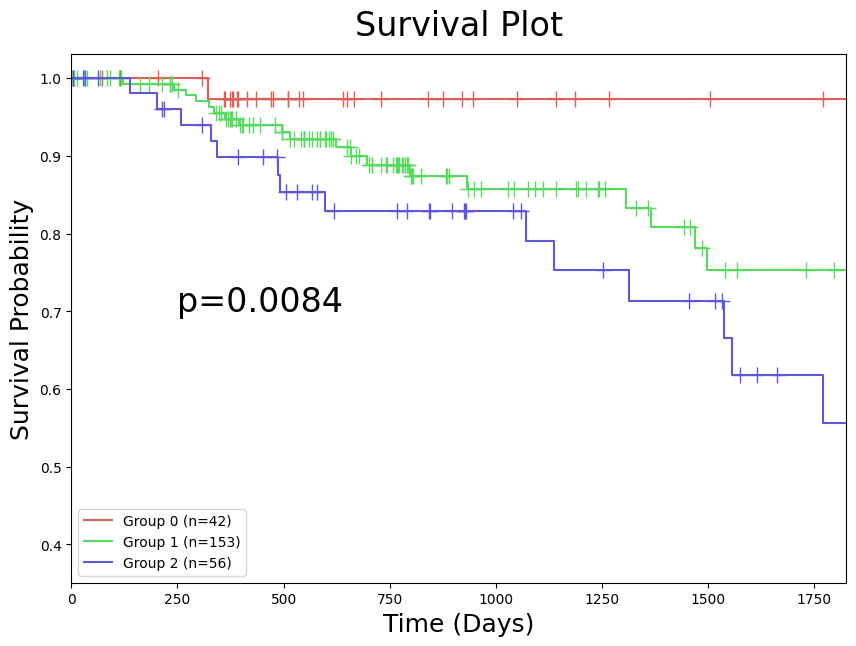

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.018023089393572975


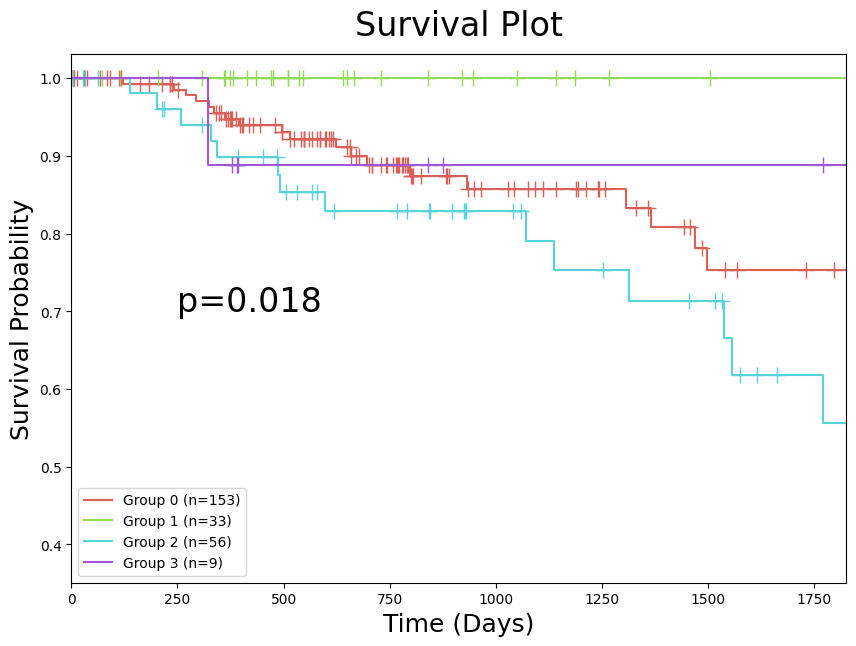

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.03832263462874404


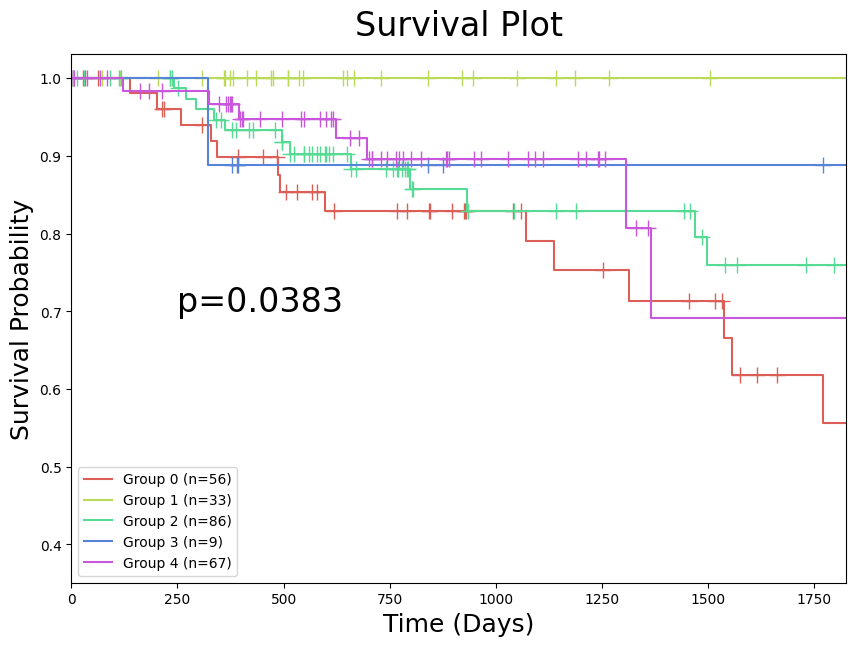

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.07149944190235162


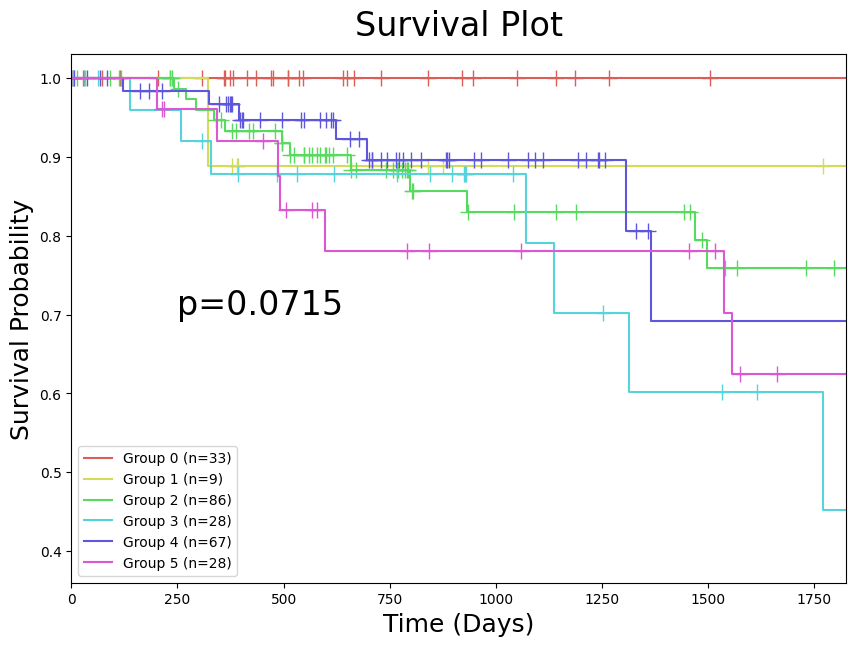

Kaplan Meier Plot constructed
0.030113892675020962
0.008415410421559745
0.018023089393572975
0.03832263462874404
0.07149944190235162


In [28]:
pval = []
for i in range(2,7):
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(enc)
    pred = pd.DataFrame(clust.labels_,index =enc.index) 
    cluster_assign = pd.DataFrame([enc.index,clust.labels_]).T
    cluster_assign.columns = ["patient", "subtype"]
    cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
    # print(cluster_assign)
    cluster_assign=cluster_assign.set_index("patient")
    clust_asgn = cluster_assign.subtype
    pval.append(cluster_KMplot(clust_asgn, surv_file, delimiter=','))
for i in pval:
    print(i)

## BIRCH

(251, 251)


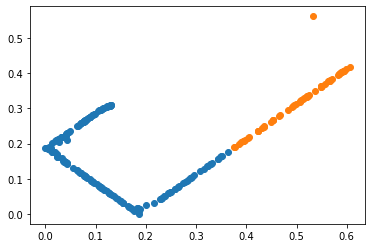

Multi-Class Log-Rank P: 0.08028977511407405


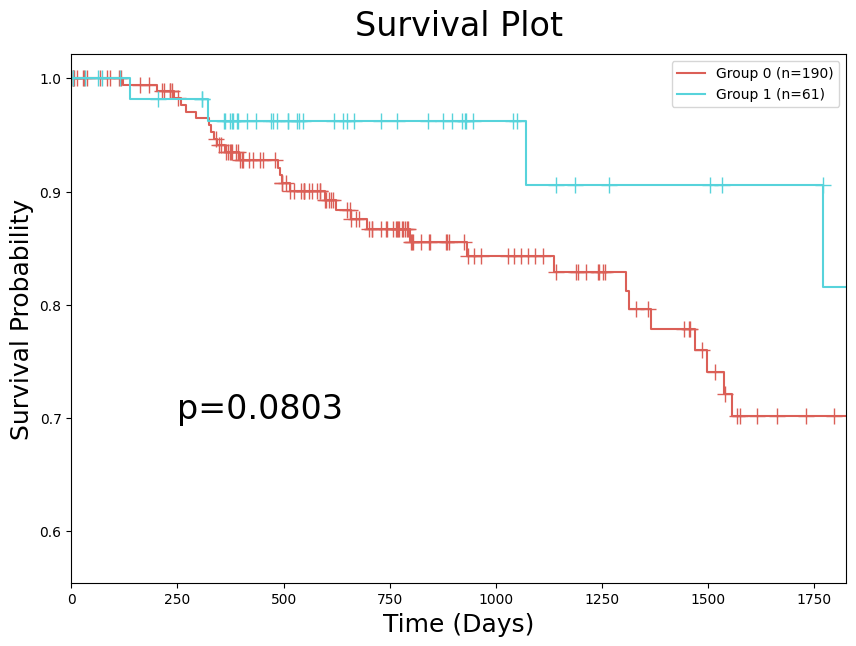

Kaplan Meier Plot constructed


0.08028977511407405

In [29]:
# X = np.array(enc)
dist = gower.gower_matrix(enc)
X = dist
print(X.shape)
model = Birch(threshold=0.01, n_clusters=2)
yhat = model.fit_predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()


cluster_assign = pd.DataFrame([enc.index,model.labels_]).T
cluster_assign.columns = ["patient", "subtype"]
cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
cluster_assign=cluster_assign.set_index("patient")
clust_asgn = cluster_assign.subtype
cluster_KMplot(clust_asgn, surv_file, delimiter=',')

0.55413
0.5541954
0.55414224
0.5733955
0.5330891


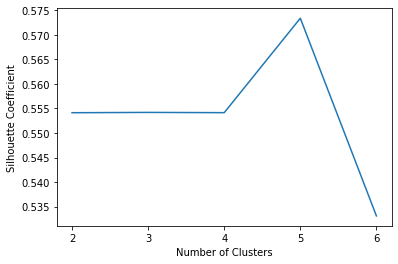

In [30]:
silhouette_coefficients = []
for k in range(2, 7):
    clust = Birch(n_clusters=k)
    clust.fit(dist)
    score = silhouette_score(dist, clust.labels_)
    silhouette_coefficients.append(score)
    print(score)
    

plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Multi-Class Log-Rank P: 0.05738340653009348


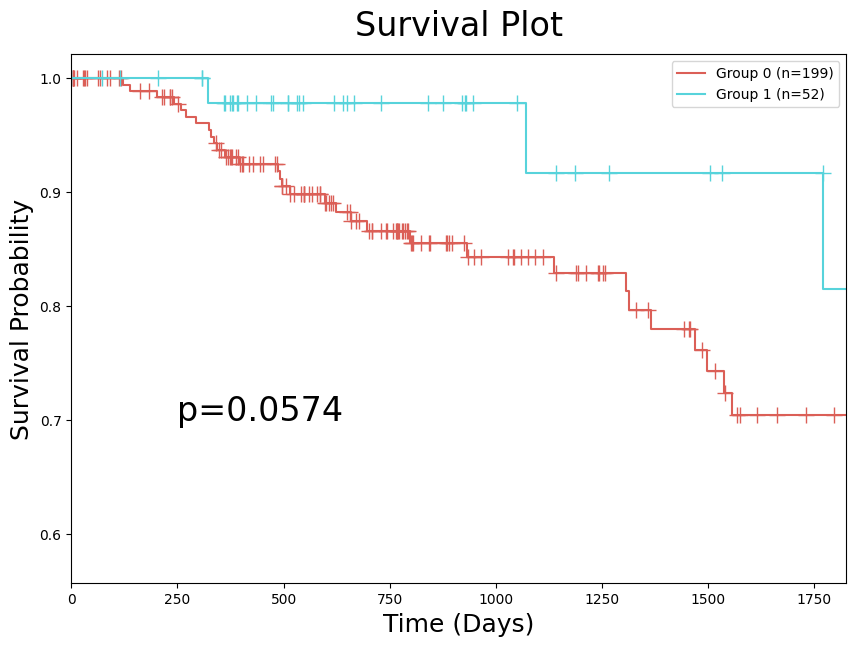

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.007989965476206201


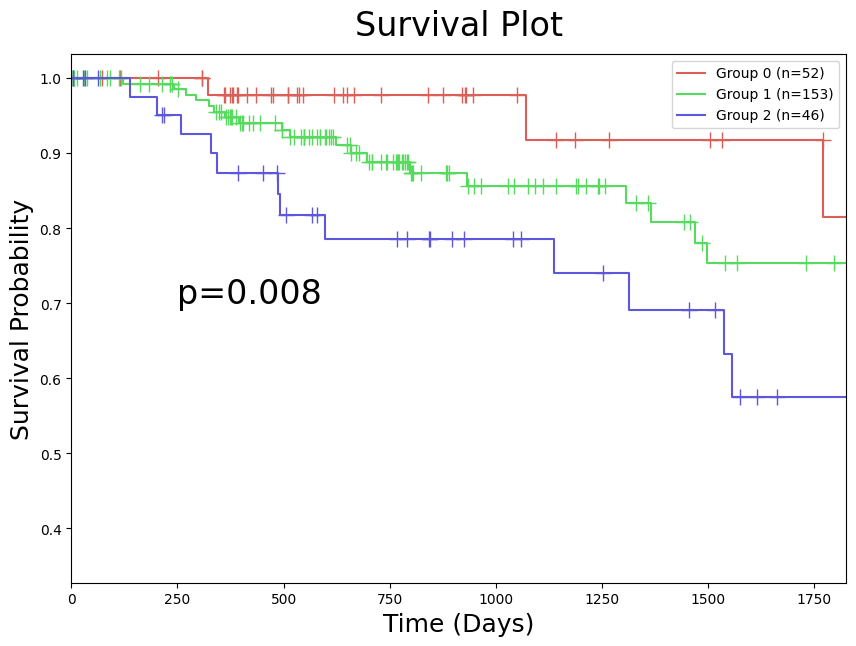

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.02159213859048928


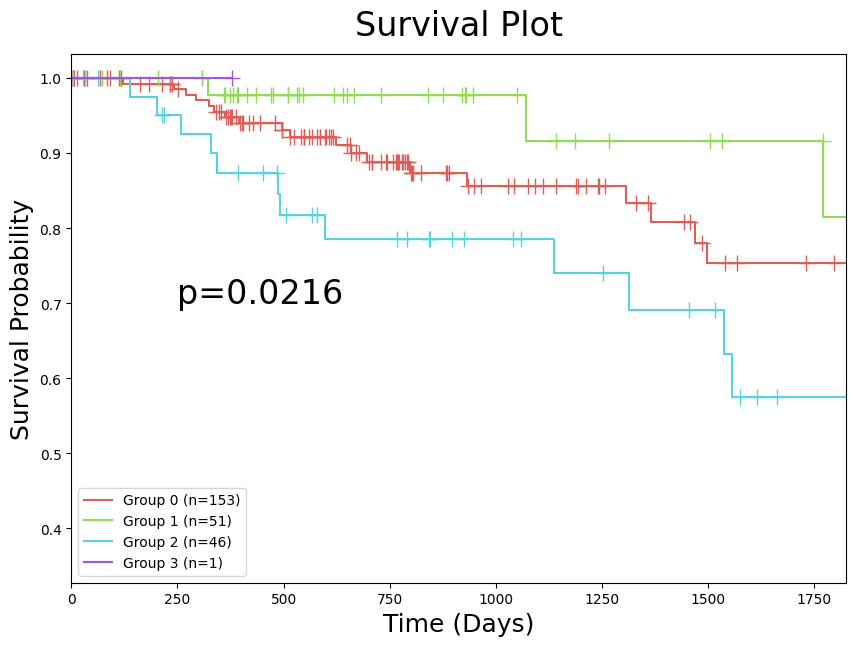

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.03862006137064103


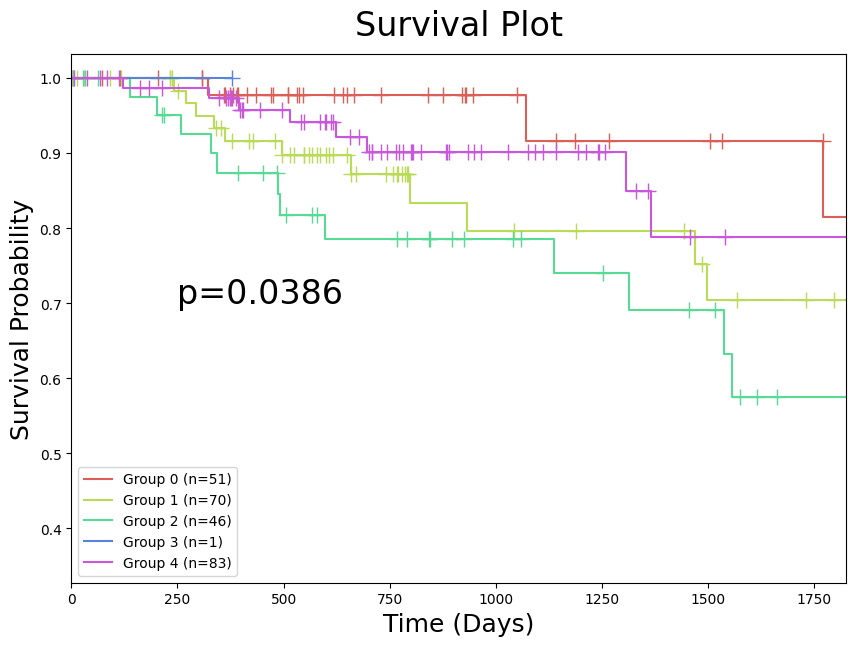

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.06780871490972111


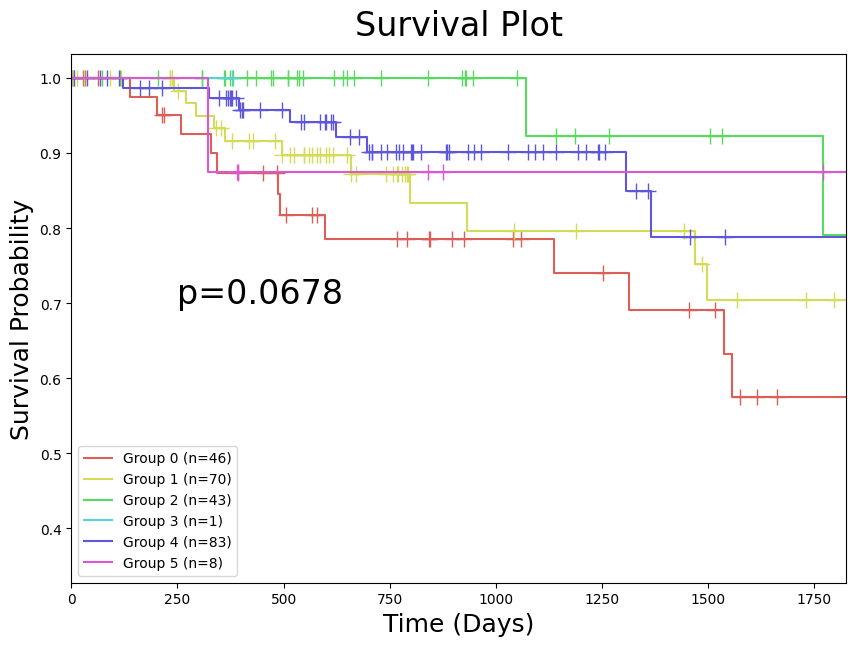

Kaplan Meier Plot constructed
0.05738340653009348
0.007989965476206201
0.02159213859048928
0.03862006137064103
0.06780871490972111


In [31]:
pval = []
for i in range(2,7):
    clust = Birch(n_clusters=i)
    clust.fit(dist)
    pred = pd.DataFrame(clust.labels_,index =enc.index) 
    cluster_assign = pd.DataFrame([enc.index,clust.labels_]).T
    cluster_assign.columns = ["patient", "subtype"]
    cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
    # print(cluster_assign)
    cluster_assign=cluster_assign.set_index("patient")
    clust_asgn = cluster_assign.subtype
    pval.append(cluster_KMplot(clust_asgn, surv_file, delimiter=','))
for i in pval:
    print(i)

## DBscan

(251, 2)


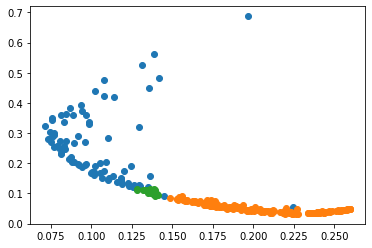

Multi-Class Log-Rank P: 0.06857219087170179


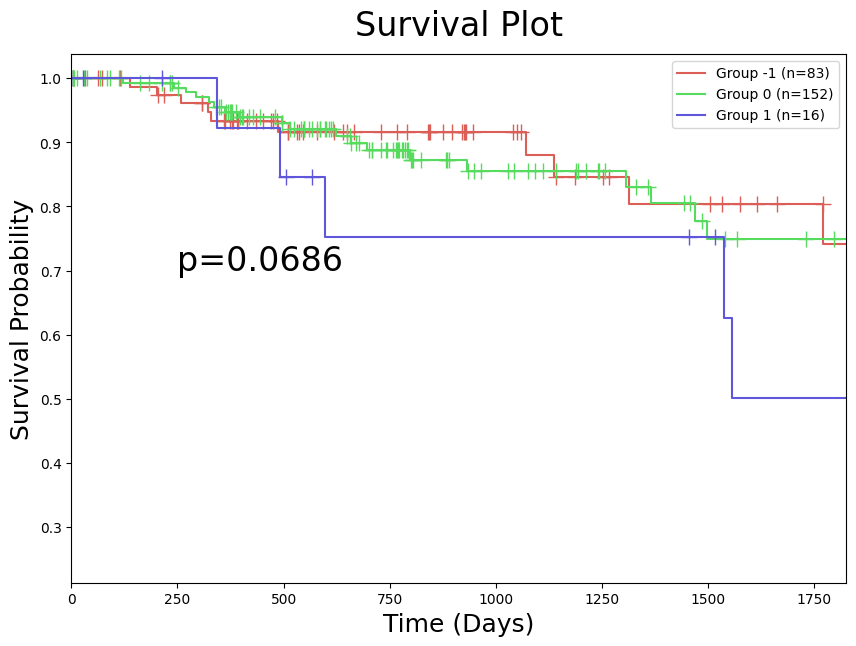

Kaplan Meier Plot constructed


0.06857219087170179

In [32]:
X = np.array(enc)
# dist = gower.gower_matrix(enc)
# X = dist
print(X.shape)
model = DBSCAN(eps=0.01, min_samples=10)
yhat = model.fit_predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()


cluster_assign = pd.DataFrame([enc.index,model.labels_]).T
cluster_assign.columns = ["patient", "subtype"]
cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
cluster_assign=cluster_assign.set_index("patient")
clust_asgn = cluster_assign.subtype
cluster_KMplot(clust_asgn, surv_file, delimiter=',')

## Meanshift

(251, 2)


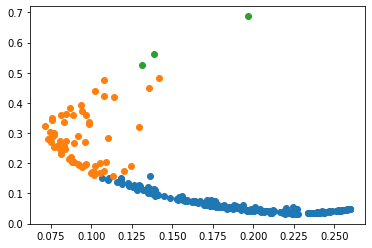

Multi-Class Log-Rank P: 0.2943666220315613


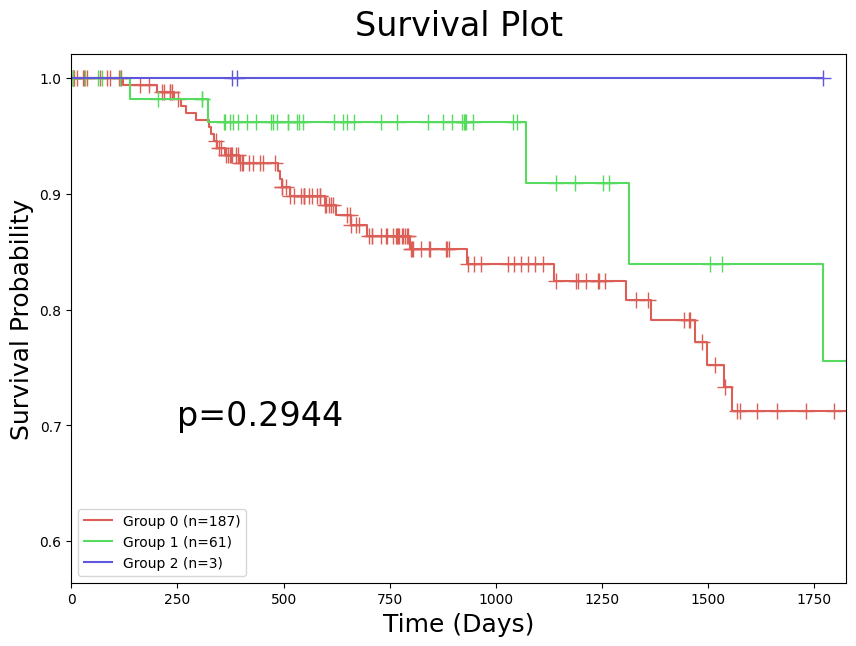

Kaplan Meier Plot constructed


0.2943666220315613

In [33]:
X = np.array(enc)
# dist = gower.gower_matrix(enc)
# X = dist
print(X.shape)
model = MeanShift()
yhat = model.fit_predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()


cluster_assign = pd.DataFrame([enc.index,model.labels_]).T
cluster_assign.columns = ["patient", "subtype"]
cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
cluster_assign=cluster_assign.set_index("patient")
clust_asgn = cluster_assign.subtype
cluster_KMplot(clust_asgn, surv_file, delimiter=',')

(251, 251)


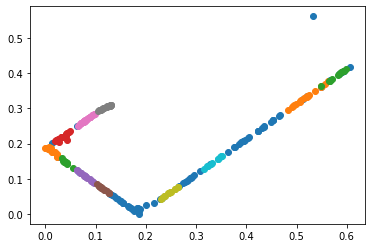

Multi-Class Log-Rank P: 0.555781186774809


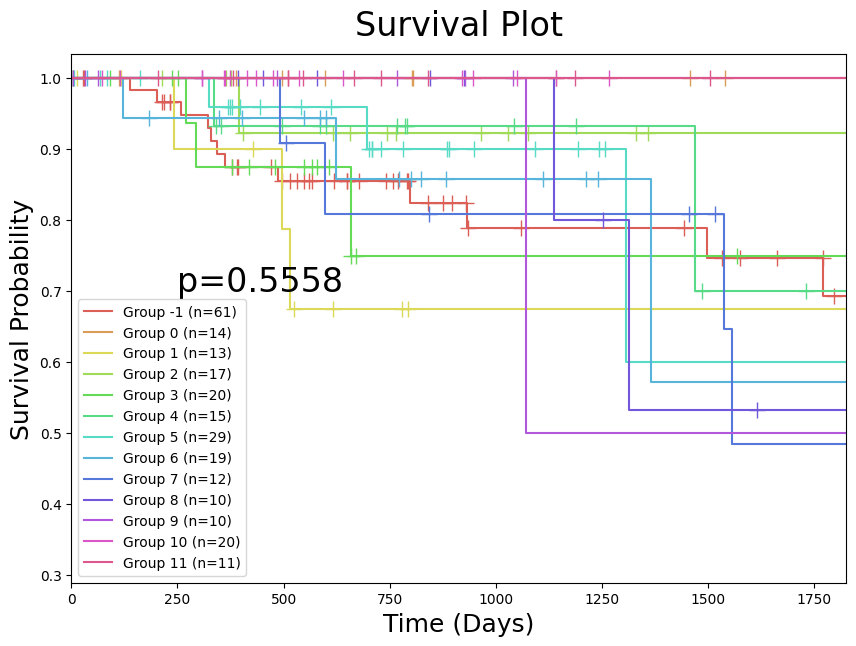

Kaplan Meier Plot constructed


0.555781186774809

In [34]:
# X = np.array(enc)
dist = gower.gower_matrix(enc)
X = dist
print(X.shape)
model = OPTICS(eps=0.8, min_samples=10)
yhat = model.fit_predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()


cluster_assign = pd.DataFrame([enc.index,model.labels_]).T
cluster_assign.columns = ["patient", "subtype"]
cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
cluster_assign=cluster_assign.set_index("patient")
clust_asgn = cluster_assign.subtype
cluster_KMplot(clust_asgn, surv_file, delimiter=',')

## Spectral Clustering

(251, 2)


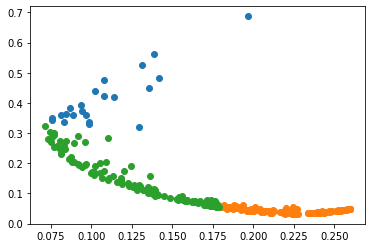

Multi-Class Log-Rank P: 0.361419258256015


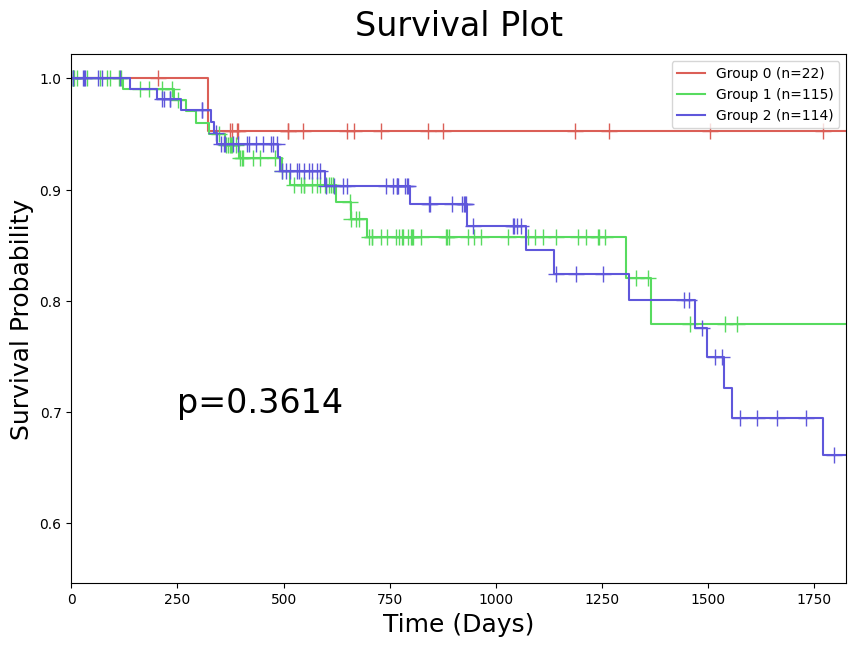

Kaplan Meier Plot constructed


0.361419258256015

In [35]:
X = np.array(enc)
# dist = gower.gower_matrix(enc)
# X = dist
print(X.shape)
model = SpectralClustering(n_clusters=3)
yhat = model.fit_predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()


cluster_assign = pd.DataFrame([enc.index,model.labels_]).T
cluster_assign.columns = ["patient", "subtype"]
cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
cluster_assign=cluster_assign.set_index("patient")
clust_asgn = cluster_assign.subtype
cluster_KMplot(clust_asgn, surv_file, delimiter=',')

0.6773615059659189
0.46864808307348726
0.468085824124151
0.24785028177757923
0.202045911442238


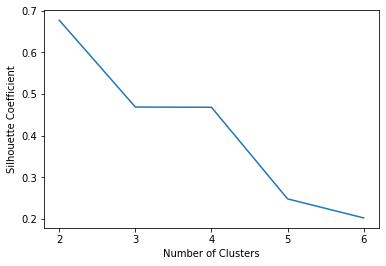

In [36]:
silhouette_coefficients = []
for k in range(2, 7):
    clust = SpectralClustering(n_clusters=k)
    clust.fit(enc)
    score = silhouette_score(enc, clust.labels_)
    silhouette_coefficients.append(score)
    print(score)
    

plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Multi-Class Log-Rank P: 0.039458280056629526


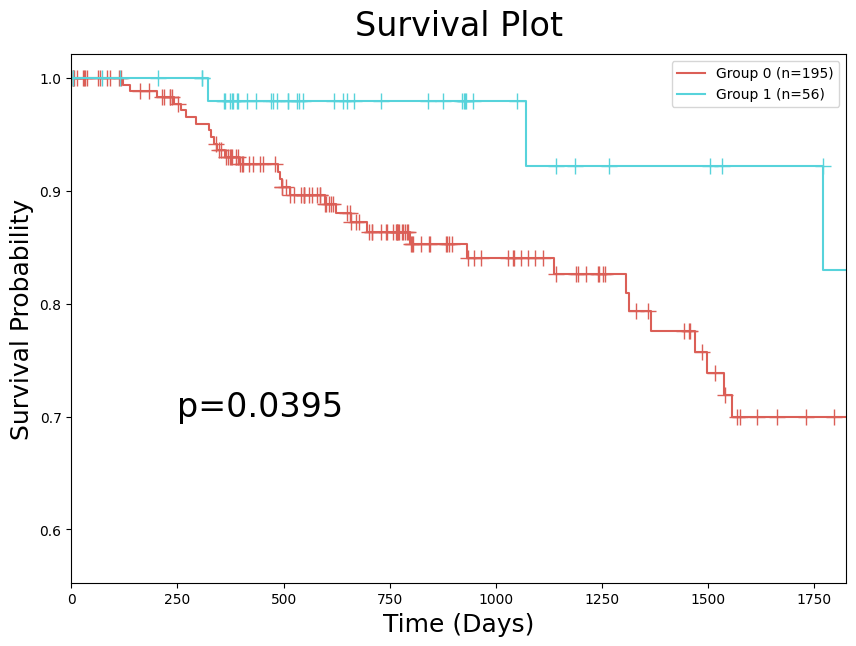

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.361419258256015


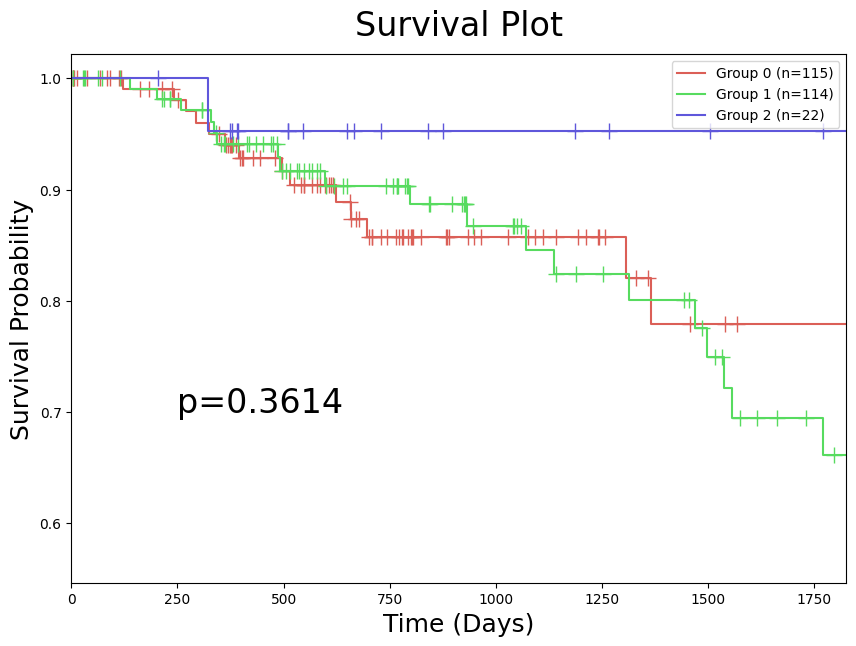

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.4433774340593313


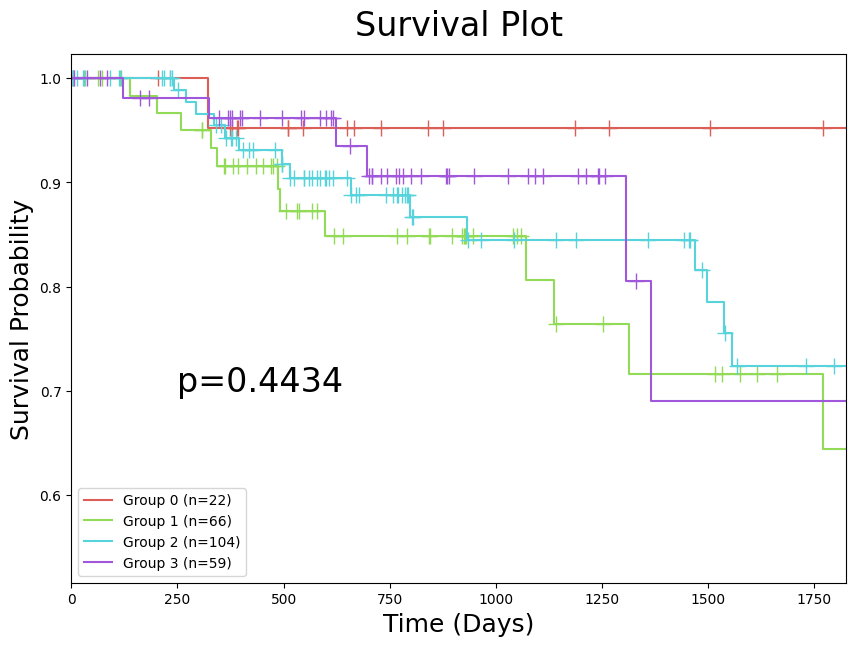

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.5258904466719855


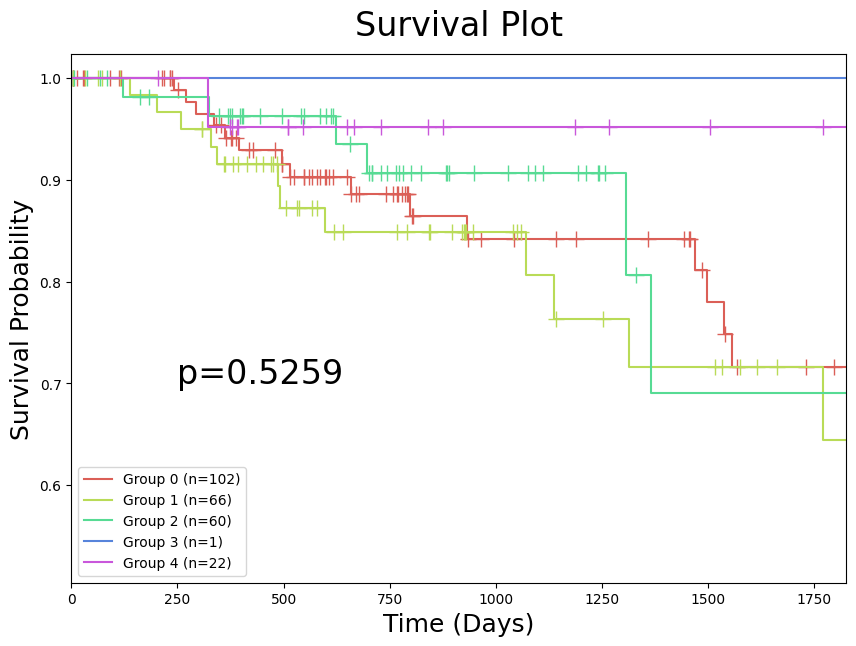

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.04519719115401993


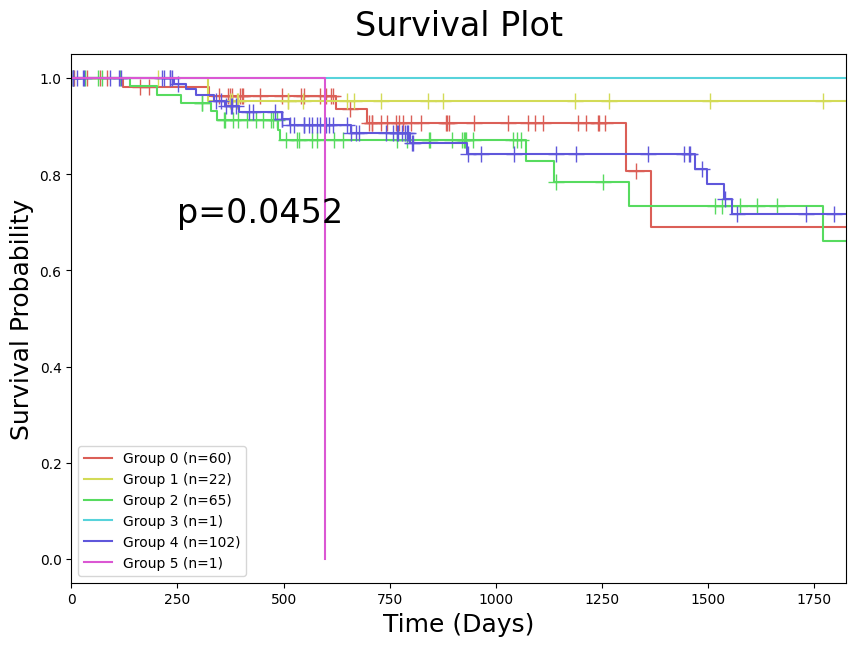

Kaplan Meier Plot constructed
0.039458280056629526
0.361419258256015
0.4433774340593313
0.5258904466719855
0.04519719115401993


In [37]:
pval = []
for i in range(2,7):
    clust = SpectralClustering(n_clusters=i)
    clust.fit(enc)
    pred = pd.DataFrame(clust.labels_,index =enc.index) 
    cluster_assign = pd.DataFrame([enc.index,clust.labels_]).T
    cluster_assign.columns = ["patient", "subtype"]
    cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
    # print(cluster_assign)
    cluster_assign=cluster_assign.set_index("patient")
    clust_asgn = cluster_assign.subtype
    pval.append(cluster_KMplot(clust_asgn, surv_file, delimiter=','))
for i in pval:
    print(i)

## Gaussian Mixture

(251, 2)


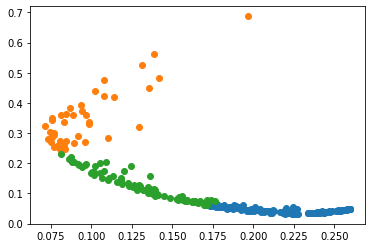

Multi-Class Log-Rank P: 0.05503436018394617


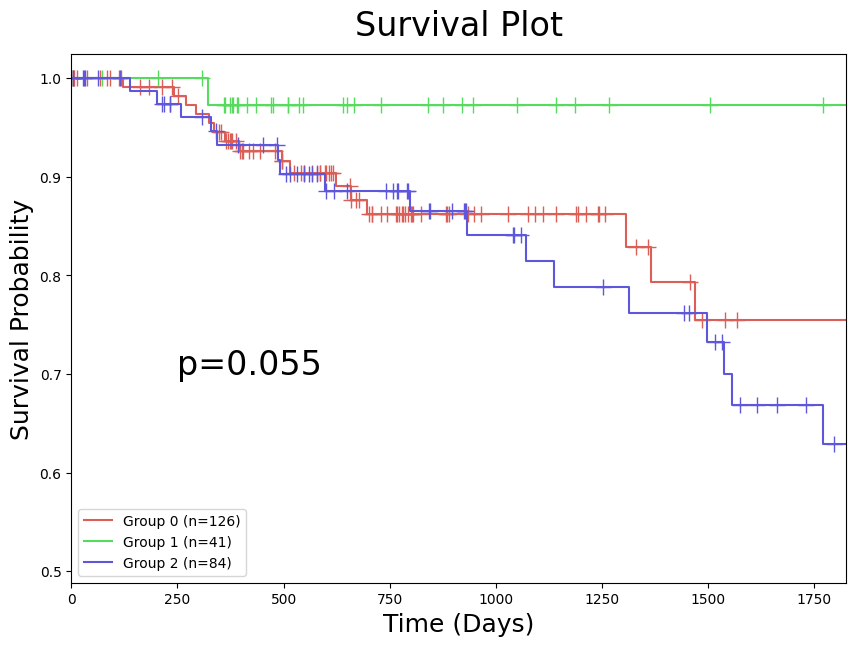

Kaplan Meier Plot constructed


0.05503436018394617

In [38]:
X = np.array(enc)
# dist = gower.gower_matrix(enc)
# X = dist
print(X.shape)
model = GaussianMixture(n_components=3)
yhat = model.fit_predict(X)
pred = pd.DataFrame(yhat,index =enc.index) 
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()


cluster_assign = pd.DataFrame([enc.index,yhat]).T
cluster_assign.columns = ["patient", "subtype"]
cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
cluster_assign=cluster_assign.set_index("patient")
clust_asgn = cluster_assign.subtype
cluster_KMplot(clust_asgn, surv_file, delimiter=',')

0.6070438278199232
0.5544836965337117
0.5205422261931015
0.53496449554848
0.4931595818188305


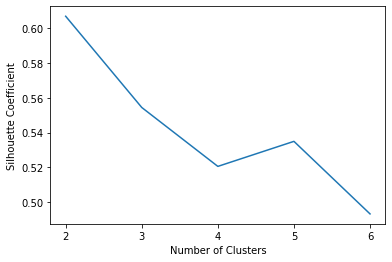

In [39]:
silhouette_coefficients = []
for k in range(2, 7):
    clust = GaussianMixture(n_components=k)
    yhat = clust.fit_predict(X)
    score = silhouette_score(enc, yhat)
    silhouette_coefficients.append(score)
    print(score)
    

plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Multi-Class Log-Rank P: 0.5115812810668051


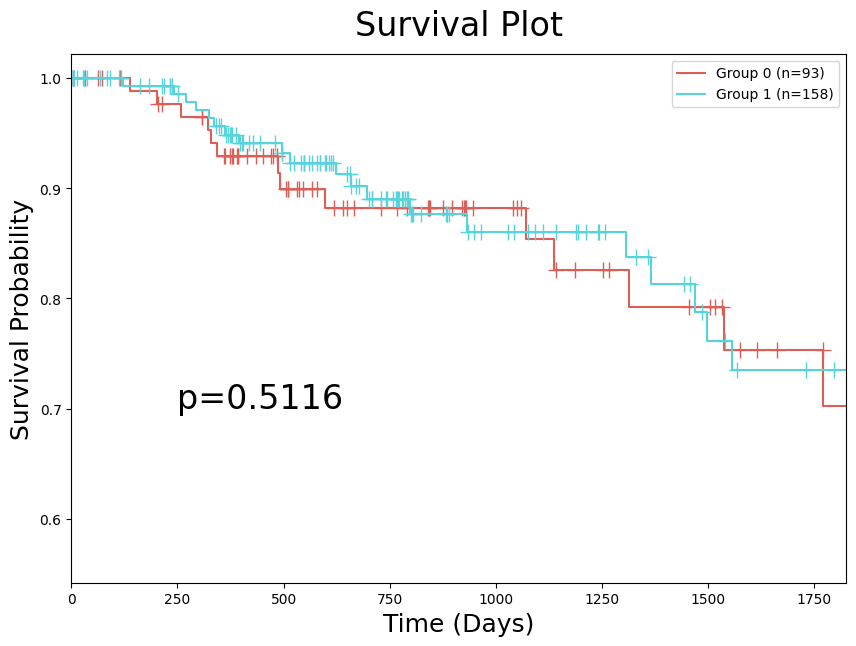

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.05503436018394617


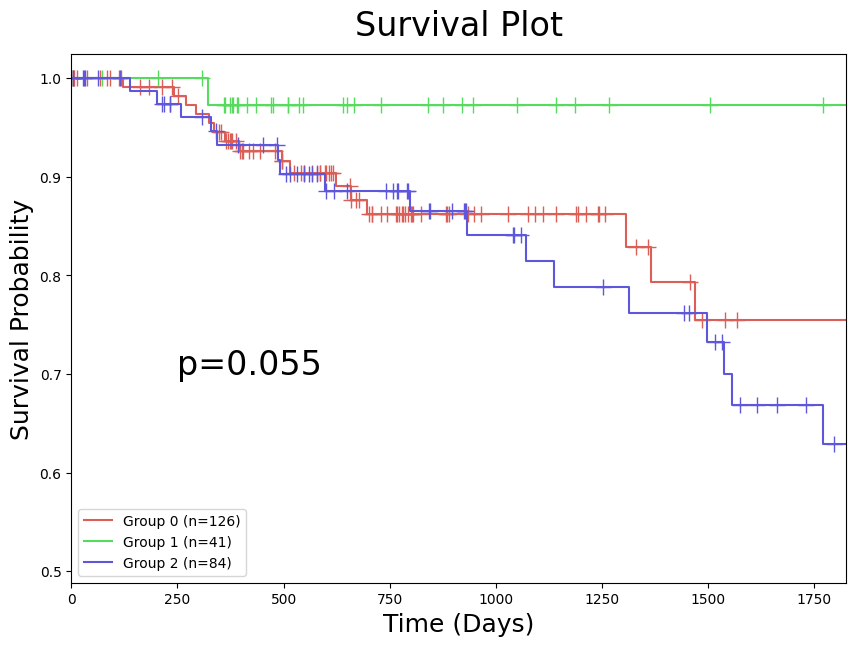

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.07655280995374204


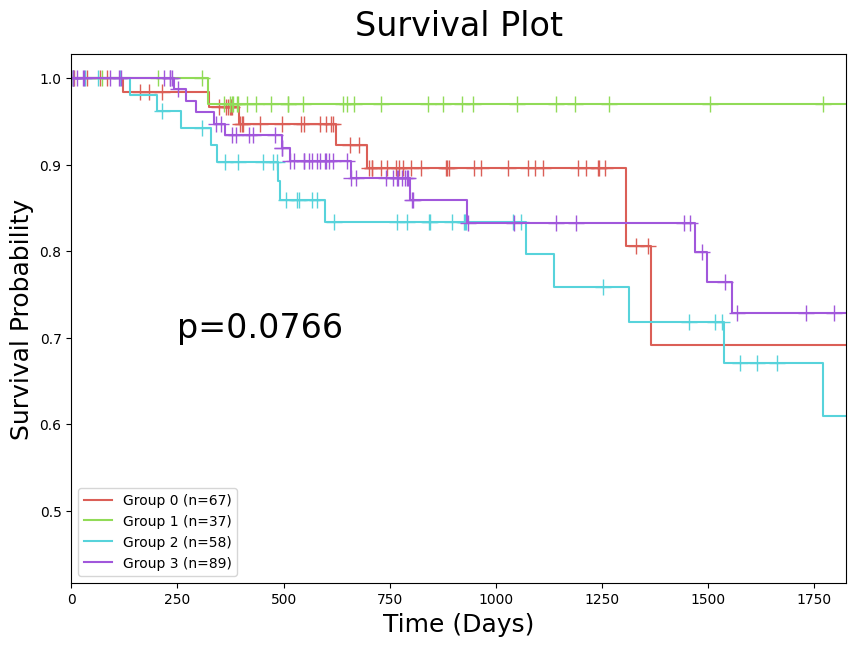

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.06237897852526933


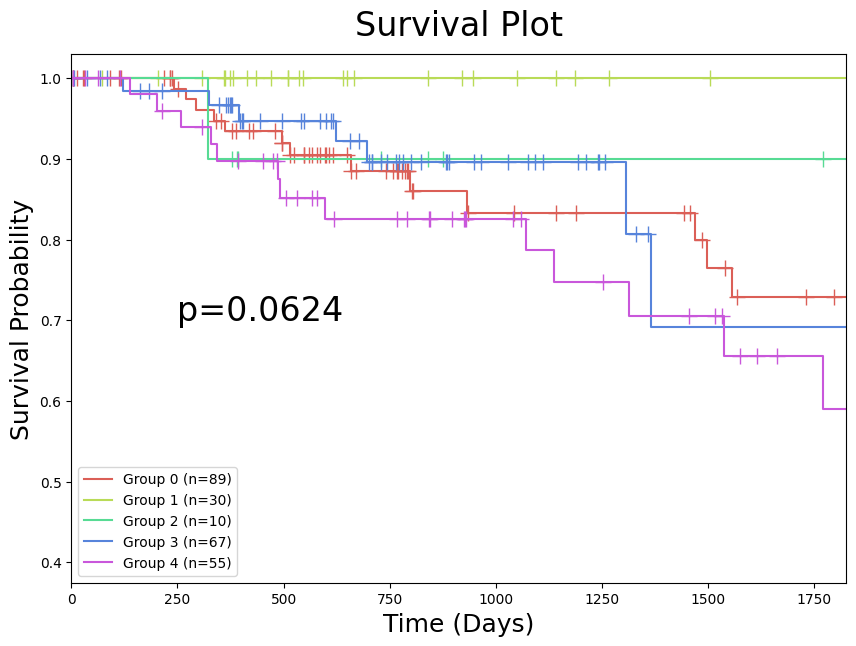

Kaplan Meier Plot constructed
Multi-Class Log-Rank P: 0.09590620539607421


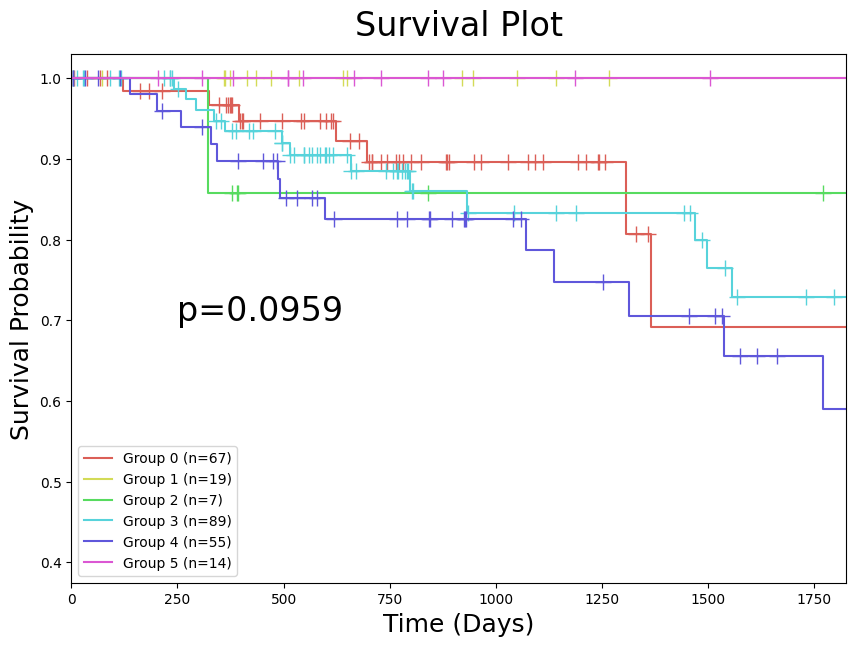

Kaplan Meier Plot constructed
0.5115812810668051
0.05503436018394617
0.07655280995374204
0.06237897852526933
0.09590620539607421


In [40]:
pval = []
for i in range(2,7):
    clust = GaussianMixture(n_components=i)
    yhat = clust.fit_predict(X)
    pred = pd.DataFrame(yhat,index =enc.index) 
    cluster_assign = pd.DataFrame([enc.index,yhat]).T
    cluster_assign.columns = ["patient", "subtype"]
    cluster_assign = cluster_assign.drop_duplicates(subset=["patient"], keep="first")
    # print(cluster_assign)
    cluster_assign=cluster_assign.set_index("patient")
    clust_asgn = cluster_assign.subtype
    pval.append(cluster_KMplot(clust_asgn, surv_file, delimiter=','))
for i in pval:
    print(i)